In [15]:
from days_statistics import DaysStatistics
from data_helper import DataHelper
import pickle
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
%matplotlib inline

In [9]:
dh = DataHelper()

In [45]:
def prepare_plot():
    fig, ax = plt.subplots(figsize=(16, 9))

    # Set axis ranges; by default this will put major ticks every 25.
    ax.set_xlim(60, 276)
    ax.set_ylim(0, 250)

    # Change major ticks to show every 20.
    ax.xaxis.set_major_locator(MultipleLocator(12))
    ax.yaxis.set_major_locator(MultipleLocator(50))

    # Change minor ticks to show every 5. (20/4 = 5)
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))

    # Turn grid on for both major and minor ticks and style minor slightly
    # differently.
    ax.grid(which='major', color='#CCCCCC', linestyle='--')
    ax.grid(which='minor', color='#CCCCCC', linestyle=':')
    return ax

In [13]:
def plot_attandace_vs(data, column):
    values = data[column].unique()
    if len(values) > 10:
        print('Too many values to plot. Consider clustering. Number of unique values for %s is %d'%(column, len(values)))
        return
   
    bad_dates = ['2018-02-20','2018-06-05','2018-06-06','2018-06-07','2018-06-08','2018-06-11',
                 '2018-06-12','2018-06-13','2018-06-14','2018-09-05','2018-03-17','2018-05-05',
                 '2018-06-10','2018-12-01']
    values.sort()
    histogram = dict()
    n = dict()
    
    for value in values:
        histogram[value] = [0]*288
        n[value] = [0]*288

    for index, row in data.iterrows():
        ts = datetime.datetime.strptime(row['time'], '%Y-%m-%d %H:%M:%S')
        slot_id = (ts.hour*12) + int(ts.minute/5)
        if row['day_of_week'] < 9 and row['pool'] > 0 and ts.strftime('%Y-%m-%d') not in bad_dates:
#             if row[column] > 4 and slot_id < 120:
#                 print(row['pool'], row['time'])
            histogram[row[column]][slot_id] += row['pool']
            n[row[column]][slot_id] += 1
    
    for value in values:
        for index, slot in enumerate(histogram[value]):
            if n[value][index] > 0:
                histogram[value][index] = histogram[value][index] / n[value][index]

    return histogram

df = pd.read_csv(dh.csv_path)
histogram = plot_attandace_vs(df, 'day_of_week')

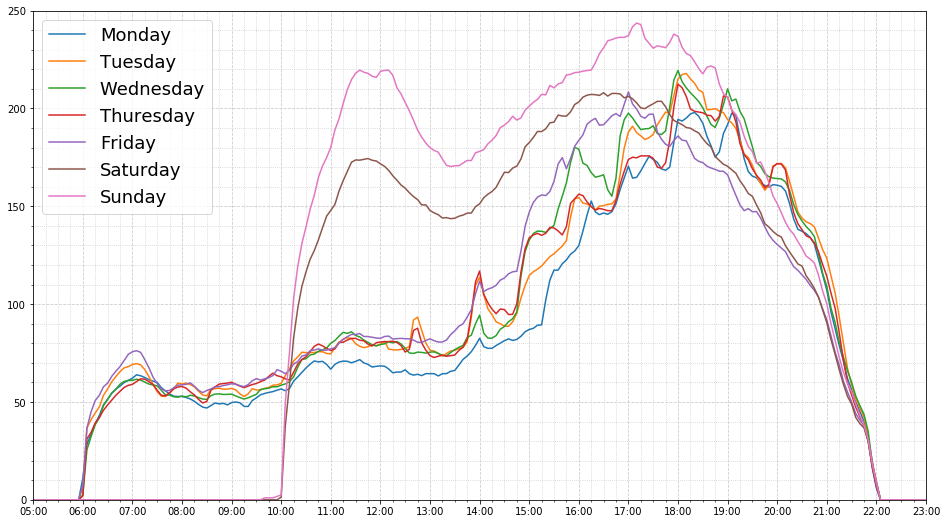

In [46]:
a = datetime(2000, 1, 1, 23, 55, 0, 342380)
y = []
for i in range(288):
    a = a + timedelta(minutes=5)
    y.append(a.strftime('%H:%M'))

days = ['Monday', 'Tuesday', 'Wednesday', 'Thuresday', 'Friday', 'Saturday', 'Sunday']
n_start = 60
n_stop = 275
ax = prepare_plot()
for i, key in enumerate(histogram.keys()):
    ax.plot(y, histogram[key], label=days[i])

ax.legend(prop={'size': 18})
# plt.show()    
plt.savefig('averages.png', dpi=300, bbox_inches='tight')